In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-03-18 09:44:18.800256


# Ristiintaulukointi

Kahden kategorisen muuttujan riippuvuutta voin tarkastella ristiintaulukoinnin avulla

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

In [3]:
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Listat muuttujien tekstimuotoisista arvoista
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
sukup = ['Mies', 'Nainen']

# Ristiintaulukointi lukumäärinä
df1 = pd.crosstab(df['koulutus'], df['sukup'])

# Otsikot kuntoon edellä määriteltyjä listoja käyttäen
df1.index = koulutus
df1.columns = sukup
df1

,Mies,Nainen
Peruskoulu,22,5
2. aste,23,7
Korkeakoulu,15,7
Ylempi korkeakoulu,2,0


In [5]:
# Ristiintaulukointi; prosentit (normalize) sarakkeiden kokonaismääristä
df2 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns') * 100

# Otsikot kuntoon edellä määriteltyjä listoja käyttäen
df2.index = koulutus
df2.columns = sukup

# Ulkoasun tuunaus
df2.style.format('{:.1f} %')

,Mies,Nainen
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


In [6]:
# Tässä edellinen n-arvoilla täydennettynä

df3 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns') * 100
df3.index = koulutus
df3.columns = sukup

# Lukumäärätaulukosta (df1) n-arvot sarakeotsikoihin
for sarake in df3.columns:
    df3 = df3.rename(columns={sarake:f'{sarake}, n = {df1[sarake].sum()}'})

df3.style.format('{:.1f} %')

,"Mies, n = 62","Nainen, n = 19"
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


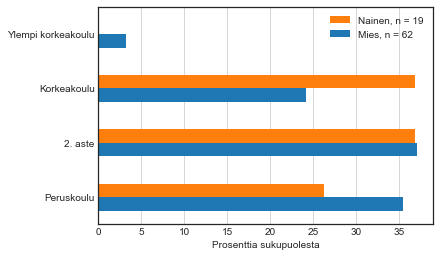

In [7]:
# Edellinen pylväinä; legend='reverse' kääntää selitteen järjestyksen
df3.plot.barh(legend='reverse')

# x-akselin otsikko
plt.xlabel('Prosenttia sukupuolesta')

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

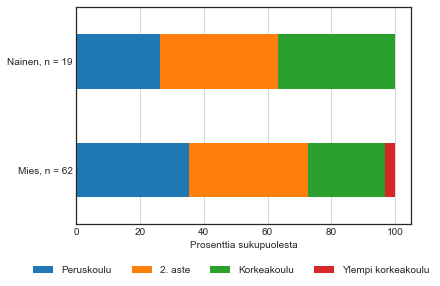

In [8]:
# Edellinen 100 % pinottuina vaakapylväinä
# T vaihtaa taulukon rivit ja sarakkeet (kaavion arvosarjat ja kategoriat) päittäin
df3.T.plot.barh(stacked=True)

# x-akselin otsikko
plt.xlabel('Prosenttia sukupuolesta')

# Pystysuuntainen taustaviivoitus
plt.grid(axis='x')

# Selitteen sijoittelu suhteessa origoon, selitteitä 4 vierekkäin
plt.legend(loc=(-0.14, -0.25), ncol=4)

## Onko ristiintaulukoinnissa havaittu riippuvuus tilastollisesti merkitsevää?

Otoksessa havaitut riippuvuudet voivat olla liian pieniä, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama riippuvuus.

Riippuvuutta sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Riippuvuuden merkitsevyyttä voit testata laskemalla niin kutsuttu **p-arvo**. Mitä pienempi p-arvo, sitä merkitsevämpi riippuvuus. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä riippuvuudesta.

Ristiintaulukointiin liittyvän p-arvon voit laskea khiin neliö -testillä (chi2_contingency). Testin palauttamat arvot ovat khiin neliö, p-arvo ja vapausasteiden määrä (df eli degrees of freedom).

In [9]:
from scipy.stats import chi2_contingency

# khiin neliö -testi lasketaan aina lukumäärätaulukosta!
chi2_contingency(df1)

(1.836533415650563,
 0.6070173075042058,
 3,
 array([[20.66666667,  6.33333333],
        [22.96296296,  7.03703704],
        [16.83950617,  5.16049383],
        [ 1.5308642 ,  0.4691358 ]]))

Khiin neliö -testin tulos: Riippuvuus ei ole merkitsevää (khiin neliö = 1.84, p = 0.607, df = 3).

Tulosteessa näkyvillä myös odotetut frekvenssit (laskennalliset frekvenssit hypoteettisessa tilanteessa, jossa ei ole lainkaan riippuvuutta).

## Lisätietoa

* Tietoa khiin neliö -testistä:
https://tilastoapu.wordpress.com/2011/10/14/6-ristiintaulukointi-ja-khiin-nelio-testi/

* Lisätietoa p-arvoista:
https://tilastoapu.wordpress.com/2012/02/14/p-arvo/

* p-arvoja Pythonilla eri testaustilanteisiin:
https://nbviewer.jupyter.org/github/taanila/tilastoapu/blob/master/p.ipynb

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/